In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
sns.set_style("whitegrid")

In [90]:
!ls *.csv

1000_Companies.csv
bharathTitanicPython.csv
covid_India.csv
iris.csv
titanic_test.csv
titanic_train.csv


In [91]:
df1=pd.read_csv("titanic_train.csv")
df2=pd.read_csv("titanic_test.csv")

In [92]:
print(df1.shape)
print(df2.shape)

(891, 12)
(418, 11)


In [93]:
df1.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [94]:
df2.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [95]:
np.setdiff1d(df1.columns.values,df2.columns.values)

array(['Survived'], dtype=object)

In [96]:
np.setdiff1d(df1.columns.values,df2.columns.values)[0]

'Survived'

In [97]:
df2[np.setdiff1d(df1.columns.values,df2.columns.values)[0]]=np.nan

In [98]:
print(df1.shape)
print(df2.shape)

(891, 12)
(418, 12)


In [99]:
titanic=df1.append(df2)
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [100]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [101]:
titanic.Embarked.mode()[0]

'S'

In [102]:
titanic.Embarked=titanic.Embarked.fillna(titanic.Embarked.mode()[0])

In [103]:
titanic.Fare.median()

14.4542

In [104]:
titanic.Fare=titanic.Fare.fillna(titanic.Fare.median())

In [105]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [106]:
titanic.drop(["PassengerId","Cabin"],axis=1,inplace=True)

In [107]:
titanic.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [108]:
titanic.groupby('Pclass').median()["Age"]

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [109]:
Pclass1age=titanic.groupby('Pclass').median()["Age"][1]
Pclass2age=titanic.groupby('Pclass').median()["Age"][2]
Pclass3age=titanic.groupby('Pclass').median()["Age"][3]
print(Pclass1age,Pclass2age,Pclass3age)

39.0 29.0 24.0


In [110]:
titanic.loc[titanic.Pclass==1,"Age"]=titanic.loc[titanic.Pclass==1,"Age"].fillna(Pclass1age)
titanic.loc[titanic.Pclass==2,"Age"]=titanic.loc[titanic.Pclass==2,"Age"].fillna(Pclass2age)
titanic.loc[titanic.Pclass==3,"Age"]=titanic.loc[titanic.Pclass==3,"Age"].fillna(Pclass3age)

In [111]:
titanic.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [112]:
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,NaN,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S
417,NaN,3,"Peter, Master. Michael J",male,24.0,1,1,2668,22.3583,C


In [113]:
pd.get_dummies(titanic.Sex,drop_first=True,prefix="gender")

,gender_male
0,1
1,0
2,0
3,0
4,1
...,...
413,1
414,0
415,1
416,1


In [114]:
titanic=pd.concat([titanic,pd.get_dummies(titanic.Sex,drop_first=True,prefix="gender")],axis=1)
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,gender_male
413,NaN,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,1
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1
416,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S,1
417,NaN,3,"Peter, Master. Michael J",male,24.0,1,1,2668,22.3583,C,1


In [115]:
titanic=pd.concat([titanic,pd.get_dummies(titanic.Pclass,drop_first=True,prefix="Pclass"),
           pd.get_dummies(titanic.Embarked,drop_first=True,prefix="Emb")],axis=1)
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,gender_male,Pclass_2,Pclass_3,Emb_Q,Emb_S
413,NaN,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,1,0,1,0,1
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0,0,0,0,0
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,0,1,0,1
416,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S,1,0,1,0,1
417,NaN,3,"Peter, Master. Michael J",male,24.0,1,1,2668,22.3583,C,1,0,1,0,0


In [116]:
titanic["bloodRelation"]=titanic.SibSp+titanic.Parch
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,gender_male,Pclass_2,Pclass_3,Emb_Q,Emb_S,bloodRelation
413,NaN,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,1,0,1,0,1,0
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0,0,0,0,0,0
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,0,1,0,1,0
416,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S,1,0,1,0,1,0
417,NaN,3,"Peter, Master. Michael J",male,24.0,1,1,2668,22.3583,C,1,0,1,0,0,2


In [117]:
titanic.drop(["Pclass","Name","Sex","SibSp","Parch","Ticket","Embarked"],axis=1,inplace=True)
titanic.head()

,Survived,Age,Fare,gender_male,Pclass_2,Pclass_3,Emb_Q,Emb_S,bloodRelation
0,0.0,22.0,7.2500,1,0,1,0,1,1
1,1.0,38.0,71.2833,0,0,0,0,0,1
2,1.0,26.0,7.9250,0,0,1,0,1,0
3,1.0,35.0,53.1000,0,0,0,0,1,1
4,0.0,35.0,8.0500,1,0,1,0,1,0


# Correcting the age column

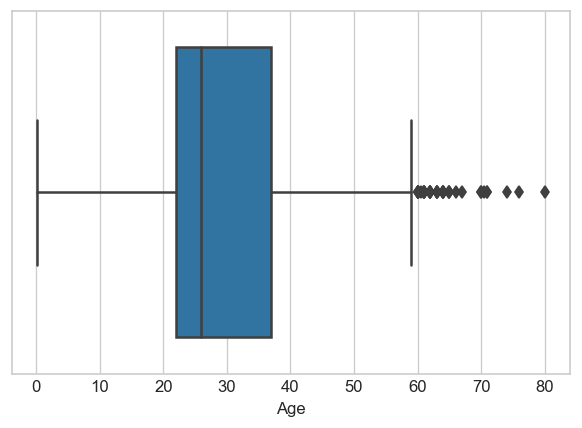

In [118]:
plt.figure(dpi=120)
sns.boxplot(x=titanic.Age)
plt.show()

In [119]:
from scipy.stats import zscore

In [120]:
np.abs(zscore(titanic.Age))

array([0.54737974, 0.66774716, 0.24359802, ..., 0.70571987, 0.39548888,
       0.39548888])

In [121]:
threshold=3

In [122]:
np.where(np.abs(zscore(titanic.Age))>threshold)

(array([ 96, 116, 493, 630, 672, 745, 851, 987], dtype=int64),)

In [123]:
np.where(np.abs(zscore(titanic.Age))>threshold)[0]

array([ 96, 116, 493, 630, 672, 745, 851, 987], dtype=int64)

In [124]:
np.where(titanic.columns=="Age")[0]

array([1], dtype=int64)

In [125]:
titanic.iloc[np.where(np.abs(zscore(titanic.Age))>threshold)[0],np.where(titanic.columns=="Age")[0]]

,Age
96,71.0
116,70.5
493,71.0
630,80.0
672,70.0
745,70.0
851,74.0
96,76.0


In [126]:
titanic.iloc[np.where(np.abs(zscore(titanic.Age))>threshold)[0],
             np.where(titanic.columns=="Age")[0]]=np.median(titanic.Age)

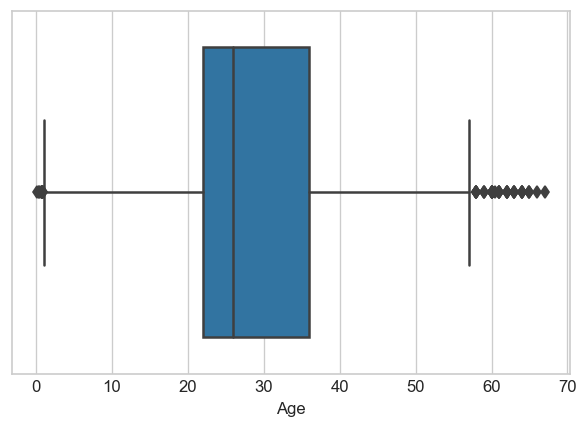

In [127]:
plt.figure(dpi=120)
sns.boxplot(x=titanic.Age)
plt.show()

# Correcting the Fare column

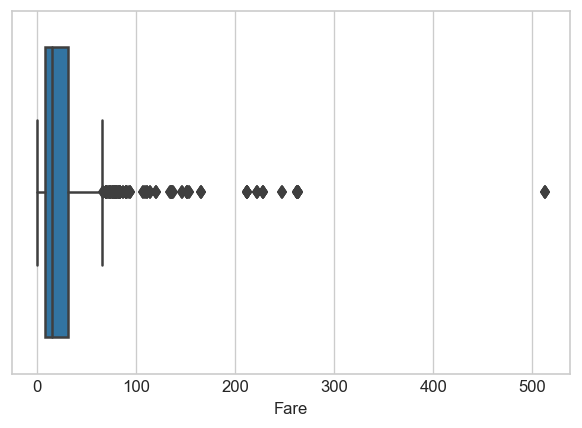

In [128]:
plt.figure(dpi=120)
sns.boxplot(x=titanic.Fare)
plt.show()

In [129]:
titanic["Fare"]=np.where(np.abs(zscore(titanic.Fare))>threshold,
                         np.median(titanic.Fare),titanic['Fare'])

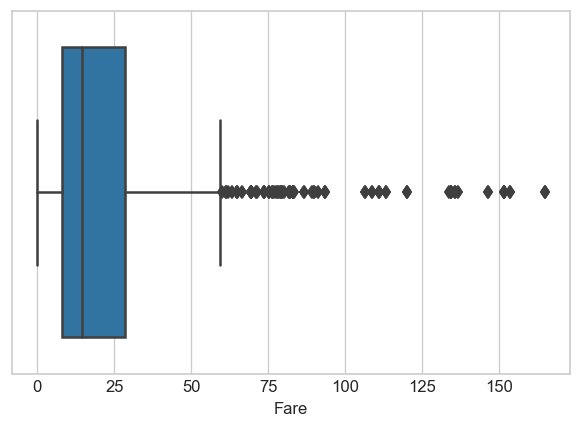

In [130]:
plt.figure(dpi=120)
sns.boxplot(x=titanic.Fare)
plt.show()

# Standardization

In [133]:
def bhaStandard(x):
    x=np.array(x)
    return ((x-np.min(x))/(np.max(x)-np.min(x)))

In [134]:
bhaStandard(np.arange(1,10))

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])

In [135]:
titanic.head()

,Survived,Age,Fare,gender_male,Pclass_2,Pclass_3,Emb_Q,Emb_S,bloodRelation
0,0.0,22.0,7.2500,1,0,1,0,1,1
1,1.0,38.0,71.2833,0,0,0,0,0,1
2,1.0,26.0,7.9250,0,0,1,0,1,0
3,1.0,35.0,53.1000,0,0,0,0,1,1
4,0.0,35.0,8.0500,1,0,1,0,1,0


In [136]:
bhaStandard(titanic.Age)

array([0.32664971, 0.56606315, 0.38650307, ..., 0.57354482, 0.35657639,
       0.35657639])

In [137]:
titanic["Age"]=bhaStandard(titanic.Age)
titanic["Fare"]=bhaStandard(titanic.Fare)

In [138]:
titanic.head()

,Survived,Age,Fare,gender_male,Pclass_2,Pclass_3,Emb_Q,Emb_S,bloodRelation
0,0.0,0.326650,0.043975,1,0,1,0,1,1
1,1.0,0.566063,0.432369,0,0,0,0,0,1
2,1.0,0.386503,0.048069,0,0,1,0,1,0
3,1.0,0.521173,0.322078,0,0,0,0,1,1
4,0.0,0.521173,0.048827,1,0,1,0,1,0


In [140]:
titanicTrain=titanic.loc[titanic.Survived.notnull(),]
titanicTrain.head()

,Survived,Age,Fare,gender_male,Pclass_2,Pclass_3,Emb_Q,Emb_S,bloodRelation
0,0.0,0.326650,0.043975,1,0,1,0,1,1
1,1.0,0.566063,0.432369,0,0,0,0,0,1
2,1.0,0.386503,0.048069,0,0,1,0,1,0
3,1.0,0.521173,0.322078,0,0,0,0,1,1
4,0.0,0.521173,0.048827,1,0,1,0,1,0


In [146]:
titanicUnknown=titanic.loc[titanic.Survived.isnull(),]
titanicUnknown.head()

,Survived,Age,Fare,gender_male,Pclass_2,Pclass_3,Emb_Q,Emb_S,bloodRelation
0,NaN,0.513691,0.047488,1,0,1,1,0,0
1,NaN,0.700733,0.042459,0,0,1,0,1,1
2,NaN,0.925183,0.058760,1,1,0,1,0,0
3,NaN,0.401466,0.052542,1,0,1,0,1,0
4,NaN,0.326650,0.074530,0,0,1,0,1,2


In [147]:
titanicUnknown=titanicUnknown.drop("Survived",axis=1)
titanicUnknown.head()

,Age,Fare,gender_male,Pclass_2,Pclass_3,Emb_Q,Emb_S,bloodRelation
0,0.513691,0.047488,1,0,1,1,0,0
1,0.700733,0.042459,0,0,1,0,1,1
2,0.925183,0.058760,1,1,0,1,0,0
3,0.401466,0.052542,1,0,1,0,1,0
4,0.326650,0.074530,0,0,1,0,1,2


# Model Development

In [148]:
titanicTrain.head()

,Survived,Age,Fare,gender_male,Pclass_2,Pclass_3,Emb_Q,Emb_S,bloodRelation
0,0.0,0.326650,0.043975,1,0,1,0,1,1
1,1.0,0.566063,0.432369,0,0,0,0,0,1
2,1.0,0.386503,0.048069,0,0,1,0,1,0
3,1.0,0.521173,0.322078,0,0,0,0,1,1
4,0.0,0.521173,0.048827,1,0,1,0,1,0


In [150]:
X=titanicTrain.drop("Survived",axis=1)
X.head()

,Age,Fare,gender_male,Pclass_2,Pclass_3,Emb_Q,Emb_S,bloodRelation
0,0.326650,0.043975,1,0,1,0,1,1
1,0.566063,0.432369,0,0,0,0,0,1
2,0.386503,0.048069,0,0,1,0,1,0
3,0.521173,0.322078,0,0,0,0,1,1
4,0.521173,0.048827,1,0,1,0,1,0


In [153]:
y=titanicTrain["Survived"].astype("int")
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int32

In [158]:
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression

In [156]:
kfold = KFold(n_splits=10, random_state=100)
model = LogisticRegression()
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results.mean()*100.0))

Accuracy: 80.25%


In [157]:
results

array([0.77777778, 0.80898876, 0.78651685, 0.83146067, 0.79775281,
       0.7752809 , 0.79775281, 0.76404494, 0.86516854, 0.82022472])

In [161]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
bhamodel = LogisticRegression()
bhamodel.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
output=bhamodel.predict(titanicUnknown)
output

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [166]:
final=pd.DataFrame({"PassengerId":df2.PassengerId,"Survived":output})
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


final.to_csv("submission.csv",index=None,header=True)

# Xgboost

In [168]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [169]:
model.fit(X,y)
final1=pd.DataFrame({"PassengerId":df2.PassengerId,
                     "Survived":model.predict(titanicUnknown)})
final1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


final.to_csv("submission.csv",index=None,header=True)